In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, json

In [28]:
# load data
datapath = glob.glob(os.path.join('./data', '2023*'))
fixation = pd.read_csv(os.path.join(datapath[0], 'fixations.csv'))
blinks = pd.read_csv(os.path.join(datapath[0], 'blinks.csv'))
events = pd.read_csv(os.path.join(datapath[0], 'events.csv'))   
imu = pd.read_csv(os.path.join(datapath[0], 'imu.csv'))

# if there is manual events labeled, cut the data to the time of the first and last event
if len(events)>2:
    start_time = events['timestamp [ns]'].iloc[1]
    end_time = events['timestamp [ns]'].iloc[-2]

    fixation = fixation.loc[(fixation['start timestamp [ns]']>=start_time) & (fixation['end timestamp [ns]']<=end_time)]
    blinks = blinks.loc[(blinks['start timestamp [ns]']>=start_time) & (blinks['end timestamp [ns]']<=end_time)]
    imu = imu.loc[(imu['timestamp [ns]']>=start_time) & (imu['timestamp [ns]']<=end_time)]

# get task type
info_path = os.path.join(datapath[0], 'info.json')
task_name = None
with open(info_path, 'r') as file:
    info = json.load(file)
    key = list(info['template_data']['data'].keys())
    task_name = info['template_data']['data'][key[0]][0]


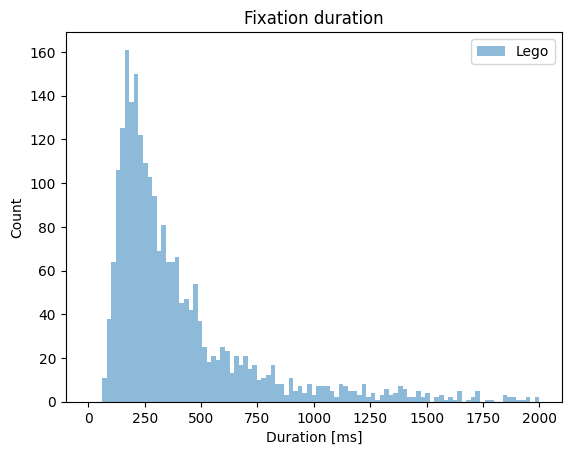

In [41]:
# fixation duration
bin_edges = np.linspace(0, 2000, 100)
plt.hist(fixation['duration [ms]'], bins = bin_edges, alpha = .5)
plt.xlabel('Duration [ms]')
plt.ylabel('Count')
plt.legend([task_name])
plt.title('Fixation duration')
plt.show()

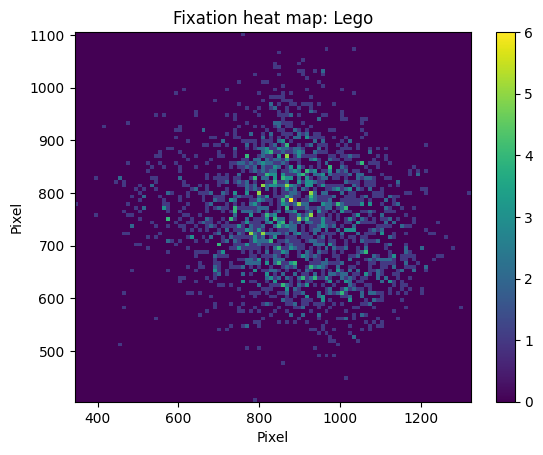

In [33]:
# fixation heatmap
plt.hist2d(fixation['fixation x [px]'], fixation['fixation y [px]'], bins=(100,100), cmap = 'viridis')
plt.colorbar()
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.title(f'Fixation heat map: {task_name}')
plt.show()


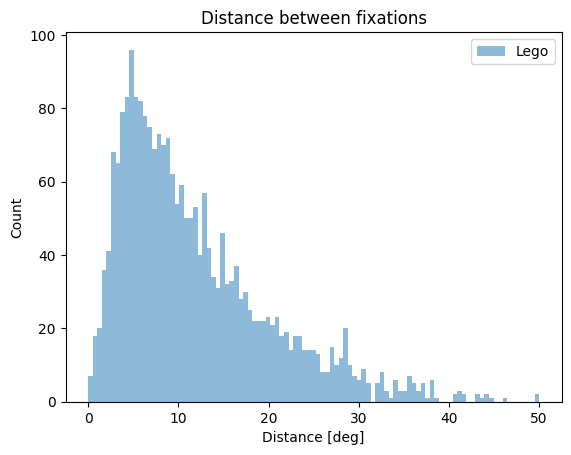

In [50]:
# distance between fixations
distance = np.linalg.norm(fixation[['azimuth [deg]', 'elevation [deg]']].iloc[:-1].to_numpy()-fixation[['azimuth [deg]', 'elevation [deg]']].iloc[1:].to_numpy(), axis=1)
plt.hist(distance, bins=np.linspace(0,50,100), alpha=.5, label=task_name)
plt.xlabel('Distance [deg]')
plt.ylabel('Count')
plt.title('Distance between fixations')
plt.legend()
plt.show()

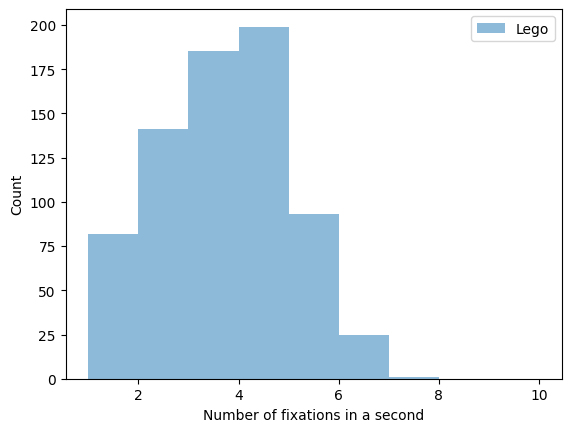

In [98]:
# number of fixations within a second
n_fixation = []
duration = 0
count = 0 
for id in range(len(fixation)):
    duration += fixation['duration [ms]'].iloc[id]
    count += 1
    if duration > 1000:
        n_fixation.append(count)
        count = 0 
        duration = 0 
    elif id == len(fixation)-1:
        n_fixation.append(count)

plt.hist(n_fixation, bins = np.arange(1,11), label=task_name, alpha = .5)
plt.xlabel('Number of fixations in a second')
plt.ylabel('Count')
plt.legend()
plt.show()

